# Deep Learning and Computer Vision

In [1]:
import cv2
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)

c:\ProgramData\anaconda3\envs\tf_env\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.6, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)


LABEL: 7

IMAGE PIXEL ARRAY:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2  

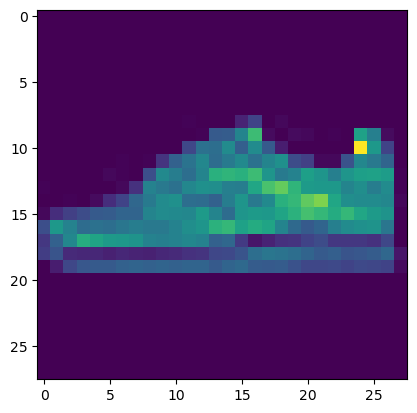

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# you can put numbers between 0 to 59999 as these are the number of training dataset images

index = 666  # this number represents the image number from the 60000 dataset and can be changed to see each picture as below

# set the number of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f"LABEL: {train_labels[index]}")
print(f"\nIMAGE PIXEL ARRAY:\n{train_images[index]}")

# visualization of the image
plt.imshow(train_images[index])

In [ ]:
# Normalize the pixel values of the train and test images to be between 0 and 1.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# build the classification model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),  # 128 here
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

In [ ]:
# Decaler sample input and convert to a tensor

input = np.array([[1.0, 3.0, 4.0, 2.0]])
input = tf.convert_to_tensor(input)
print(f"input to softmax function: {input.numpy()}")

# feed the input to softmax activation function
output = tf.keras.activations.softmax(input)
print(f"output from softmax function: {output.numpy()}")

# get the sum of all the values after the software activation function is applied
sum = tf.reduce_sum(output)
print(f"sum of output: {sum}")

# get the index with highest value
prediction = np.argmax(output)
print(f"class with highest probability: {prediction}")

input to softmax function: [[1. 3. 4. 2.]]
output from softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of output: 1.0
class with highest probability: 2


In [ ]:
# compiling the model
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7842 - loss: 0.6236
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8641 - loss: 0.3779
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8787 - loss: 0.3323
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8845 - loss: 0.3128
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8905 - loss: 0.2965


In [ ]:
# evaluate the accuracy of the model on unseen data

model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8754 - loss: 0.3452


[0.34489211440086365, 0.8761000037193298]